In [8]:
# https://python-course.eu/numerical-programming/estimation-corona-cases-with-python-and-pandas.php

<AxesSubplot: xlabel='dates'>

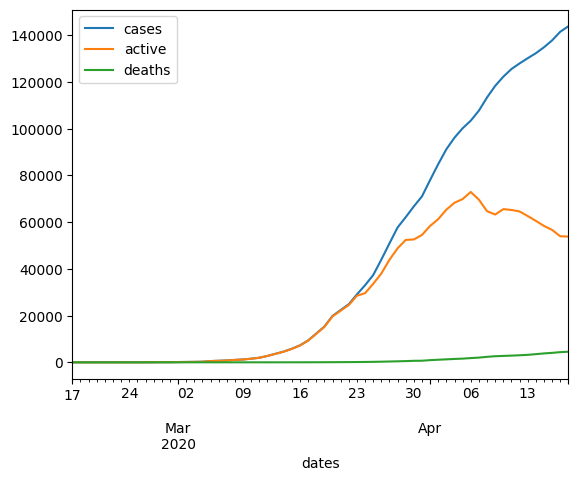

In [9]:
import pandas as pd

xf = pd.ExcelFile("./data1/coronacases.xlsx")
df = xf.parse("Sheet1", 
         skiprows=2, 
         index_col=0,
         names=["dates", "cases", "active", "deaths"])

df[["cases", "active", "deaths"]].plot()

<AxesSubplot: xlabel='dates'>

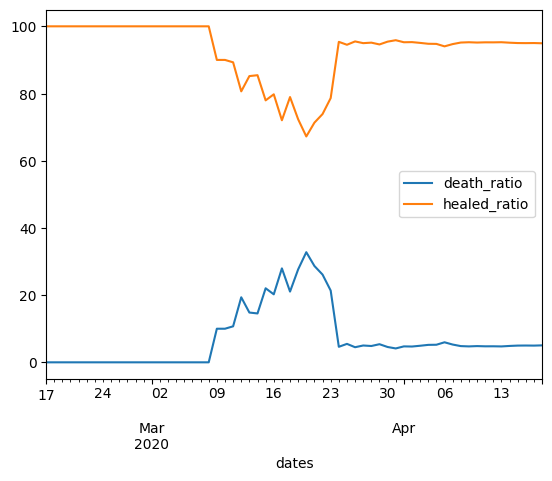

In [10]:
discharged = df["cases"] - df["active"]

if "healed" in df.columns:
    df.drop("healed", axis=1, inplace=True)
if "healed" not in df.columns:
    df.insert(loc=len(df.columns),
              column="healed",
              value=(discharged -df["deaths"]))

healed_ratio = df["healed"] * 100 / discharged
healed_ratio
death_ratio = df["deaths"] * 100 / discharged
death_ratio

outcome = {"death_ratio": death_ratio, "healed_ratio": healed_ratio}
outcome_df = pd.DataFrame(outcome)
outcome_df
outcome_df.plot()

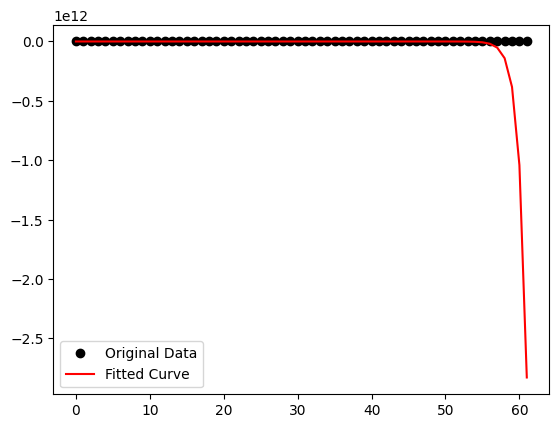

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def growth_func(x, a, b, c):
  return a * np.exp(b * x) + c
  
Y = df.healed.values
X = np.arange(0, len(Y))
popt, pcov = curve_fit(growth_func, X, Y)

def growth(x):
    return growth_func(x, *popt)

plt.figure()
plt.plot(X, Y, 'ko', label="Original Data")
plt.plot(X, growth(X), 'r-', label="Fitted Curve")
plt.legend()
plt.show()

#for i in range(1, 30):
#    print(df.cases.values[i], growth(i))

In [12]:
days_infected_before_outcome = 14
assumed_real_death_rate = 2.9

def create_inverse_growth_func(a, b, c):
    def inverse(x):
        return np.log((x - c) / a) / b
    return inverse

inverse_growth = create_inverse_growth_func(*popt)

# number of cases 'days_infected_before_outcome':
cases_days_infection_before = df["deaths"][-1] * 100 / assumed_real_death_rate 
shift_days = inverse_growth(cases_days_infection_before)
shift_days -= (len(df) - days_infected_before_outcome)
print(shift_days)

nan


/tmp/ipykernel_3984/3221844592.py:6: RuntimeWarning: invalid value encountered in log
  return np.log((x - c) / a) / b


In [15]:
print(len(df["cases"]))
x = np.arange(0, len(df["cases"]))
print(len(x))
if "real" in df.columns:
    df.drop("real", axis=1, inplace=True)
df.insert(loc=len(df.columns),
          column="real",
          value=growth(x+shift_days).astype('int32'))
df

62
62


/tmp/ipykernel_3984/3343938874.py:8: RuntimeWarning: invalid value encountered in cast
  value=growth(x+shift_days).astype('int32'))


,cases,active,deaths,healed,real
dates,,,,,
2020-02-17,16,9,0,7,-2147483648
2020-02-18,16,7,0,9,-2147483648
2020-02-19,16,7,0,9,-2147483648
2020-02-20,16,3,0,13,-2147483648
2020-02-21,16,2,0,14,-2147483648
...,...,...,...,...,...
2020-04-14,132210,60515,3495,68200,-2147483648
2020-04-15,134753,58349,3804,72600,-2147483648
2020-04-16,137698,56646,4052,77000,-2147483648
